In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [14]:
#in this cas we are trying to split up the data so we take in the dataframe, and then we put in a lookback period
def processData(data, lb):

    #makes two arrays
    X,Y = [],[]

    #iterates as many times as the columns except for the last 11 spots 
    for i in range(len(data) - lb - 1):

        #then we want to append that data into the dataframes
        X.append(data[i: (i + lb), 0])
        Y.append(data[(i + lb), 0])

        return np.array(X), np.array(Y)


In [15]:
data = yf.download("AMZN", start = '2019-06-01', interval = '1h', end = '2021-01-07', progress = False)[['Close']]
data.head()

,Close
Date,
2019-06-03,1713.890015
2019-06-03,1721.839966
2019-06-03,1692.410034
2019-06-03,1688.592773
2019-06-03,1694.300049


<AxesSubplot:xlabel='Date'>

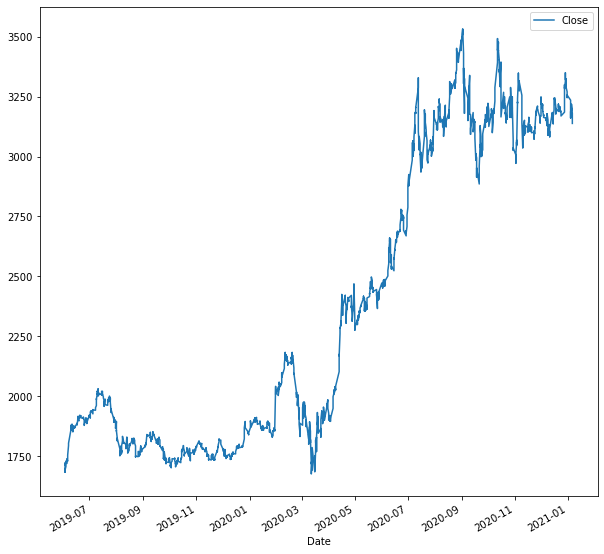

In [16]:
data.plot(figsize = (10, 10))

In [17]:
#this turns the data frame into a series
cl = data.Close.astype("float32")

#makes the min max scalar datatype
scl = MinMaxScaler()

#this cuts the datalength what we want to do is to use 90% of the data to predict 10%
train = cl[0: int(len(cl) * 0.90)]

#not sure what this does but it looks like it is normalizing variables, we need to reshape the data in 2D array because that is what transform takes, making it into a sparse matrix
scl.fit(train.values.reshape(-1,1))

#this transforms the data into easier to read 
cl = scl.transform(cl.values.reshape(-1,1))

In [18]:
#making the lookback and processing the data

lb = 10 
X,y = processData(cl, lb)

In [19]:
X_train, X_test = X[:int(X.shape[0] * 0.90)], X[int(X.shape[0] * 0.90):]
y_train, y_test = y[:int(y.shape[0] * 0.90)], y[int(y.shape[0] * 0.90):]

print("X_train.shape[0]:", X_train.shape[0], "X_train.shape[1]:", X_train.shape[1])
print("X_test.shape[0]:", X_test.shape[0], "X_test.shape[1]:", X_test.shape[1])
print("y_train.shape[0]:", y_train.shape[0])
print("y_trian.shape[0]:", y_test.shape[0])

X_train.shape[0]: 0 X_train.shape[1]: 10
X_test.shape[0]: 1 X_test.shape[1]: 10
y_train.shape[0]: 0
y_trian.shape[0]: 1


In [20]:
#making the model
model = Sequential()
model.add(LSTM(256, input_shape = (lb,1)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

In [23]:
#not sure why they chose to reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [24]:
history = model.fit(X_train, y_train, epochs = 300, validation_data = (X_test, y_test), shuffle = False)

Epoch 1/300


ValueError: Expect x to be a non-empty array or dataset.